In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qubit import qubit

2024-04-02 19:18:23,047 - qm - INFO     - Starting session: 4426847e-bd3d-41b1-aae7-fdf0ac858a48


In [18]:
qb = qubit('q1-testing')
qb.update_value('rr_LO',6.3e9)
qb.update_value('tof',200)


Loading parameter JSON file
Setting qubit LO to 4.48 GHz
Setting readout LO to 6.3 GHz
Updating rr_LO to 6300000000.0
Setting readout LO to 6.3 GHz
Updating tof to 200


# Time of flight

Updating rr_atten to 0
Updating n_avg to 10000
Updating rr_IF to 5000000.0
Updating readout_length to 1000
2024-04-03 09:03:37,531 - qm - INFO     - Performing health check
2024-04-03 09:03:37,547 - qm - INFO     - Health check passed
2024-04-03 09:03:37,683 - qm - INFO     - Sending program to QOP for compilation
2024-04-03 09:03:37,722 - qm - INFO     - Executing program


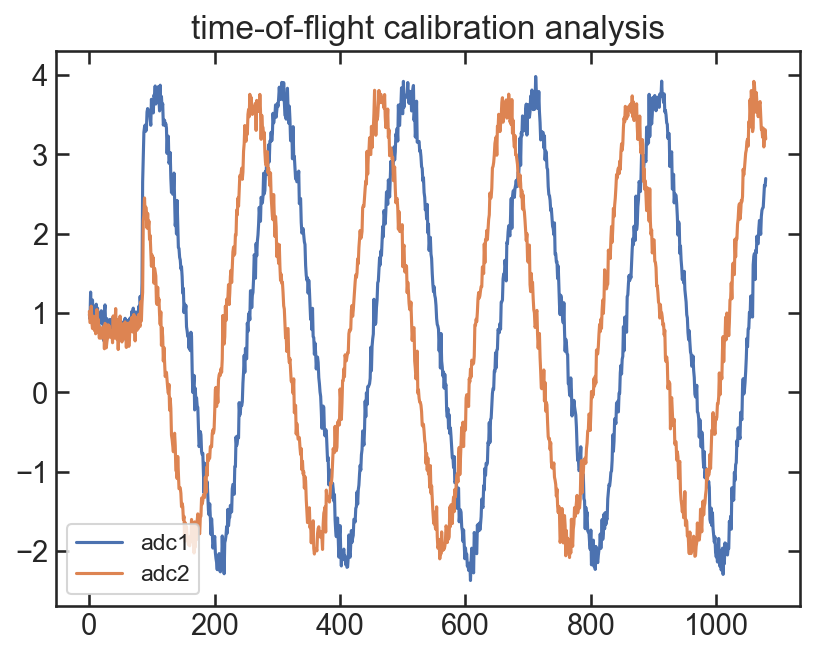

Input 1 Offset: 0.2146295166015625 mV
Input 2 Offset: 0.19149034288194447 mV
Updating analog_input_offsets to [0.030426446273243042, 0.039729316797253146]


In [19]:
qb.update_value('rr_atten',0)
qb.update_value('n_avg',10000)
qb.update_value('rr_IF',5e6)
qb.update_value('readout_length',1000)
qb.tof_cal()

In [ ]:
qb.run_scan(df = 0.1e6,
                 n_avg = 500,
                 element='resonator',
                 check_mixers=False,
                 chunksize = 200e6,
                 attenuation=20,
                 lo_min = 6e9,
                 lo_max = 7e9,
                 amp_q_scaling = 1,
                 saturation_dur = 20e3,
                 showprogress=False, 
                 res_ringdown_time = 4e3,
                 plot=True, flux=0)